In [86]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [87]:
wires = 12

# dev = qml.device('default.tensor',wires=wires)
# dev = qml.device('qiskit.aer', wires=wires)
dev = qml.device('default.qubit', wires=wires)

@qml.qnode(dev)
def circuit():

    for i in range(3):
        qml.Hadamard(wires=i)

    # a xor b
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[1,3])
    
    qml.CNOT(wires=[0,4])
    qml.CNOT(wires=[2,4])

    qml.MultiControlledX(control_wires=[3,4],control_values='11',wires=5)

    # qml.PauliX(wires=5)    
    # qml.CSWAP(wires=[5,0,6])
    # qml.CSWAP(wires=[5,1,7])
    # qml.CSWAP(wires=[5,2,8])
    # qml.PauliX(wires=5)   
    
    qml.Barrier(wires=range(wires))
    #==========================================
    


    qml.Barrier(wires=range(wires))
    

    


    return qml.probs(wires=[0,1,2,5])



In [88]:
results=circuit()
# print(results[0])



/opt/anaconda3/lib/python3.7/site-packages/pennylane/ops/qubit/non_parametric_ops.py:2009: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  category=UserWarning,


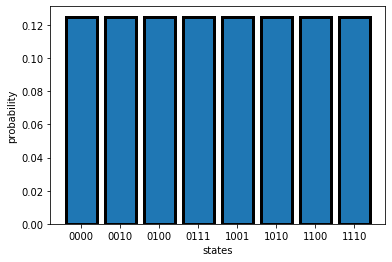

In [89]:


import matplotlib.pyplot as plt

x=[]
y=[]

for i in range(len(results)):
    if(results[i]>0):
         x.append(np.binary_repr(i,4))
         y.append(results[i])
plt.bar(x,y);
plt.xlabel('states');
plt.ylabel('probability');
# plt.xticks(rotation=90);
plt.show()

In [90]:
# x=[i for i in range(-3,4)]
# y=[]
# for i in x:
#     y.append(circuit(i)[0])
# # x.reverse()
# # y.reverse()
# print(x)
# print(y)
# # plot scatter plot with x and y data
# plt.scatter(x, y)
  
# # plot with x and y data
# plt.plot(x, y)

# # results=circuit()
# # print(results[0])

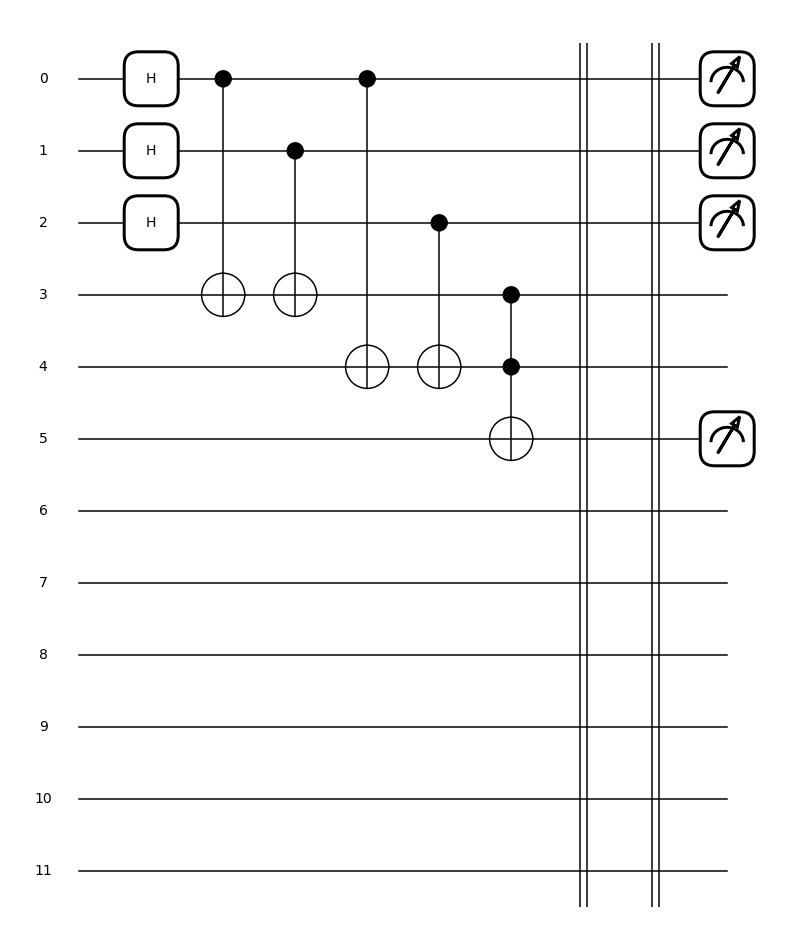

In [91]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)()
plt.show()